In [1]:
# Necessary imports for this notebook
import os

import numpy as np
import pandas as pd

import datetime
import time

import random

# For plotting
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

In [2]:
import kaggle

In [3]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [4]:
api.dataset_download_file('ealtman2019/credit-card-transactions',
                          file_name='credit_card_transactions-ibm_v2.csv',
                          path='./datasets')

True

In [5]:
import zipfile

with zipfile.ZipFile('./datasets/credit_card_transactions-ibm_v2.csv.zip', 'r') as zipref:
    zipref.extractall('./datasets/')

In [6]:
creditcard_df= pd.read_csv("./datasets/credit_card_transactions-ibm_v2.csv").sample(n=100000, random_state=42)
creditcard_df.to_csv('./datasets/credit_card_transactionsz-modified.csv') 
creditcard_df.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
18199893,1470,0,2019,7,10,00:11,$59.18,Chip Transaction,-6853385250336487907,Harwood,MD,20776.0,5813,NaN,No
9731325,822,1,2019,1,14,22:12,$280.91,Online Transaction,4241336128694185533,ONLINE,NaN,NaN,4814,NaN,No
536687,41,3,2010,3,15,07:07,$-144.00,Swipe Transaction,190253443608377572,Hemet,CA,92543.0,3359,NaN,No
13223840,1084,0,2015,9,20,14:58,$6.76,Chip Transaction,-7837310524365334241,Littleton,CO,80122.0,5300,NaN,No
17070521,1384,0,2014,10,12,11:44,$9.17,Swipe Transaction,-5023497618971072366,Gardner,KS,66030.0,5812,NaN,No


In [7]:
file = './datasets/credit_card_transactions-ibm_v2.csv'
if(os.path.exists(file) and os.path.isfile(file)):
  os.remove(file)
  print("file deleted")
else:
  print("file not found")

file deleted


In [8]:
zip_folder = './datasets/credit_card_transactions-ibm_v2.csv.zip'
if(os.path.exists(zip_folder) and os.path.isfile(zip_folder)):
  os.remove(zip_folder)
  print("deleted")
else:
  print("not found")

deleted


In [9]:
creditcard_df.dtypes

User                int64
Card                int64
Year                int64
Month               int64
Day                 int64
Time               object
Amount             object
Use Chip           object
Merchant Name       int64
Merchant City      object
Merchant State     object
Zip               float64
MCC                 int64
Errors?            object
Is Fraud?          object
dtype: object

In [10]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 18199893 to 4816941
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   User            100000 non-null  int64  
 1   Card            100000 non-null  int64  
 2   Year            100000 non-null  int64  
 3   Month           100000 non-null  int64  
 4   Day             100000 non-null  int64  
 5   Time            100000 non-null  object 
 6   Amount          100000 non-null  object 
 7   Use Chip        100000 non-null  object 
 8   Merchant Name   100000 non-null  int64  
 9   Merchant City   100000 non-null  object 
 10  Merchant State  88782 non-null   object 
 11  Zip             88134 non-null   float64
 12  MCC             100000 non-null  int64  
 13  Errors?         1576 non-null    object 
 14  Is Fraud?       100000 non-null  object 
dtypes: float64(1), int64(7), object(7)
memory usage: 12.2+ MB


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

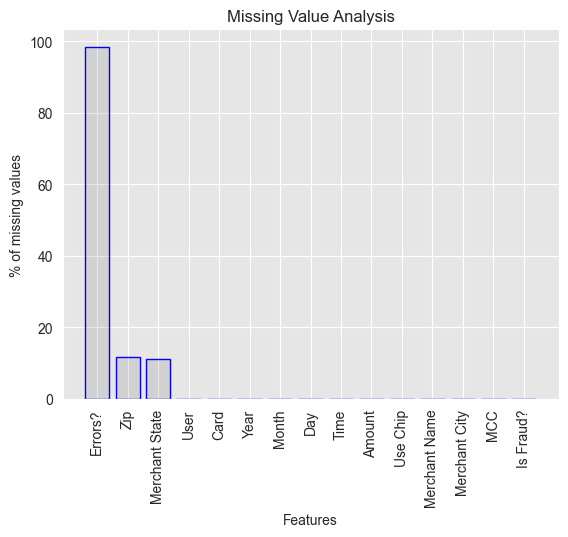

In [11]:
percent_missing=(creditcard_df.isnull().sum()*100/creditcard_df.shape[0]).sort_values(ascending=True)
plt.title("Missing Value Analysis")
plt.xlabel("Features")
plt.ylabel("% of missing values")
plt.bar(percent_missing.sort_values(ascending=False).index,percent_missing.sort_values(ascending=False),color=(0.1, 0.1, 0.1, 0.1),edgecolor='blue')
plt.xticks(rotation=90)

In [12]:
creditcard_df.isnull().sum()

User                  0
Card                  0
Year                  0
Month                 0
Day                   0
Time                  0
Amount                0
Use Chip              0
Merchant Name         0
Merchant City         0
Merchant State    11218
Zip               11866
MCC                   0
Errors?           98424
Is Fraud?             0
dtype: int64